### The Plan
1. Clean, split up, and remove punctuation from both translations
        a. Split on each word of each line in each poem
        b. Alternatively, split by line, poem, canto
        c. Maybe just split by poem and canto
2. Stem each of the translations using Snowball 
        a. try Lancaster/Lemmatizer and see if it's more effective
3. Create dtms/tfidfs for each of the poems in each of the translations
4. Use tfidfs to view each poem as a vector in a vector space
        a. Measure euclidean distance between two different translations' versions of the same poem
        b. Merits of using cosine distance?
5. Visualize the range of differences between the poems and see which ones are the most different
        a. (If time/needed, perform most common words/most distinct word analysis)
        b. Analyze most different poems from a literary perspective and propose difference in interpretation
        c. Ansatz/Pithy Solution: Hypothetical difference due to time period and British relations with Russia due to Cold War

In [4]:
%pylab inline 
#import matplotlib or from matplotlib import *
import numpy as np
import string
from datascience import *

from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball  import SnowballStemmer
from nltk.stem import WordNetLemmatizer

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [5]:
def clean_punctuation(text):
    text_cleaned = []
    punctuation = string.punctuation + '’' + '–' + '“'
    
    for i in np.arange(len(text)):
        #remove punctuation
        cleaned_poem = []
        for j in text[i]:
            text_string = j.split()
            text_tokens = []
            for word in text_string:
                if word in punctuation:
                    continue
                else:
                    new_word = "".join([char for char in word if char not in punctuation])
                    if new_word != '':
                        text_tokens.append(new_word)           
            cleaned_poem.append(text_tokens)
        text_cleaned.append(cleaned_poem)
    return text_cleaned

def stem_english_words(poem):
    stemmed_words = []
    english_stemmer = SnowballStemmer('english')
    for line in poem:
        stemmed_line = []
        for word in line:
            stemmed_line.append(english_stemmer.stem(word))
        stemmed_words.append(stemmed_line)
    return stemmed_words

def fast_clean(poem):
    punctuation = [punc for punc in string.punctuation] + ['"', "'", "--", "`"]
    new_poem = poem.lower()
    for punc in punctuation:
        new_poem = new_poem.replace(punc, '')
    return new_poem

def fast_stem(poem):
    english_stemmer = SnowballStemmer('english')
    stemmed_poem = []
    poem_split = poem.split(' ')
    for word in poem_split:
        stemmed_poem.append(english_stemmer.stem(word))
    return "".join([word + " " for word in stemmed_poem])

In [83]:
with open('spalding_new.txt') as file_in:
    spalding = file_in.read()

spalding_list = spalding.split('\n\n')

spalding_list = [fast_clean(poem) for poem in spalding_list if (poem!='' and len(poem) > 10)] #make all lowercase

print(len(spalding_list))

spalding_stemmed = [fast_stem(poem) for poem in spalding_list]

spalding = Table().with_columns([['Cleaned', spalding_list], ['Stemmed', spalding_stemmed]])


369


In [86]:
with open('johnston-cleaned.txt') as file_in:
    johnston = file_in.read()

johnston_list = johnston.split('\n\n')

johnston_list = [poem.lower() for poem in johnston_list if (poem != '' and len(poem) > 10)] #make all lowercase
johnston_list = [fast_clean(poem) for poem in johnston_list] #clean

print(len(johnston_list))

johnston_stemmed = [fast_stem(poem) for poem in johnston_list]

johnston = Table().with_columns([['Cleaned', johnston_list], ['Stemmed', johnston_stemmed]])
johnston_new = johnston.exclude([44, 96, 161, 162, 164, 223, 346, 354]).with_column('Index', np.arange(366))
spalding_new = spalding.exclude([103, 117, 118]).with_column('Index', np.arange(366))
joined = johnston_new.join('Index', spalding_new)

joined

374


Index,Cleaned,Stemmed,Cleaned_2,Stemmed_2
0,my uncle high ideals inspire him but when past joking h ...,my uncl high ideal inspir him but when past joke he fel ...,my uncles goodness is extreme if seriously he hath dise ...,mi uncl good is extrem if serious he hath diseas he hat ...
1,such were a young rakes meditations by will of zeus th ...,such were a young rake medit bi will of zeus the high ...,thus mused a madcap young who drove through clouds of d ...,thus muse a madcap young who drove through cloud of dus ...
2,after a fine career his father had only debts on which ...,after a fine career his father had onli debt on which t ...,having performed his service truly deep into debt his f ...,have perform his servic truli deep into debt his father ...
3,but when the hour of youthful passion struck for evgeny ...,but when the hour of youth passion struck for evgeni wi ...,when youths rebellious hour drew near and my eugene the ...,when youth rebelli hour drew near and my eugen the path ...
4,we all meandered through our schooling haphazard so to ...,we all meander through our schooling haphazard so to go ...,we all of us of education a something somehow have obta ...,we all of us of educ a someth somehow have obtain thus ...
5,now latins gone quite out of favour yet truthfully and ...,now latin gone quit out of favour yet truth and not in ...,latin is just now not in vogue but if the truth must ...,latin is just now not in vogu but if the truth must r ...
6,he was without that dithyrambic frenzy which wrecks our ...,he was without that dithyrambic frenzi which wreck our ...,for empty sound the rascal swore he existence would no ...,for empti sound the rascal swore he exist would not ma ...
7,evgenys total store of knowledge i have no leisure to r ...,evgeni total store of knowledge i have no leisur to rec ...,but upon all that eugene knew have no leisure here to ...,but upon all that eugen knew have no leisur here to d ...
8,how early hed learnt to dissemble to hide a hope to mak ...,how earli hed learnt to dissemble to hide a hope to mak ...,how soon he learnt deceptions art hope to conceal and ...,how soon he learnt decept art hope to conceal and jeal ...
9,how well he donned new shapes and sizes startling the ...,how well he don new shape and size startl the ingenu w ...,how well he played the greenhorns part to cheat the in ...,how well he play the greenhorn part to cheat the inexp ...


In [8]:
###Document Term Matrix

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def create_dtm(text_list):
    cv = CountVectorizer()
    dtm = cv.fit_transform(text_list)
    # De-sparsify
    desparse = dtm.toarray()
    # Create labels for columns
    word_list = cv.get_feature_names()
    # Create a new Table
    dtm_tb = Table(word_list).with_rows(desparse)
    return dtm_tb

def create_tfidf(text_list, stop_words):
    cv = CountVectorizer(stop_words = stop_words)
    dtm = cv.fit_transform(text_list)
    tt = TfidfTransformer(norm='l1',use_idf=False)
    dtm_tf = tt.fit_transform(dtm)
    return dtm_tf

def feature_names(text_list, stop_words):
    cv = CountVectorizer(stop_words = stop_words)
    dtm = cv.fit_transform(text_list)
    return cv.get_feature_names()

In [96]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
j_dtm_tf = create_tfidf(johnston_new.column('Stemmed'), ENGLISH_STOP_WORDS)
j_words = feature_names(johnston_new.column('Stemmed'), ENGLISH_STOP_WORDS)
johnston_table = Table(j_words).with_rows(j_dtm_tf.toarray())
johnston_table

abandon | abate | abhor | abhorred  | abhorrent | abiding | ablaze | able | abounded | abounding | abov | abroad | abrupt | absenc | absolut | absolution | absorb | absorpt | abstract | abstraction | absurd | abuying | acacias | academ | academician | accept | access | accid | accord | account | accounting | accused | accustom | ace  | ach  | aches | achiev | achieved | aching | acquaint  | acquainted | acres | act   | action | activ | active | actrices | acut | adam      | add   | added | address | addressed | adel | administrator | admir     | admiration | admire | admission | admit | admonit | admonition | ado  | adopted | ador      | adoration | adorer | adorn | adorned | adrian | advantag | advent | advice | advis | advoc | aeneid | aeolian | aeon | afar | affair | affect | affectation | affected | affection | affright | aflam | afloat | aflying | afraid | afresh | africa | aft  | afterward | ag   | agafon | age  | agent | ages | aggression | agitation | aglitter | ago  | agoni | agre | agree | agreed | agricultur | ah   | ahead | aid  | ail  | ailing | aim  | aiming | aims | air  | airs | akulka | al   | ala  | alarm | alban | albion | album | alertly | alia | alien | alight | alik | alina | aliv | allayed | allerg    | allforeseeing | alli | allow | allowed | alluding | allã | alma | almanac | almanack | aloft | alon      | alphabetic | alreadi | altar | altarmat | alter | altered | altogether | alway | amateur | amaz | ambassador | amber | ambition | amelioration | amend | amends | amid | amidst | amor | ampli | amus      | amusing | analys | anana | anathematising | ancestr | anchorites | ancient | andryushka | anecdotecollection | anew | ang  | angel | angri | anguish | ani  | anisia | annalist | annette | announc | annoy | anoth | answer | anticip | antler | anxieti | apac | apart | apartment | apollo | appal | appalling | apparelled | apparition | appeal | appear | appearing | appears | appetites | applaus | applejack | appointment | appreciated | appreciating | apprehension | approach | approaching | approbation | appropriation | approv | apuleius | aquiver | ar   | arbitrari | arch | archcomment | arching | archrak | ardent | argot | argu | aris | aristocratic | arm  | armi | armida | arousing | arr  | arrang | arrange | arranged | arrears | arrest | arriv | arrive | arriving | arrow | art       | artific | artless   | ash  | ashimmer | ashiver | asid | aside | ask       | aspen | aspiration | aspirations | assail | assembl | assembly | asses | assess   | assignation | assum | assume | assurance | astern | astonish | astound | asunder | aswinging | ate  | atmospher | atour | atrembl | atrocious | attack | attain | attainments | attend    | attendants | attended | attent | attention | attir | attire | attract | attraction | attractive | attribut | attun | audaci | audienc | augment   | aunt | aurora | author | autocrat | autograph | automatic | automedon | autumn | avert | avow | await | awaited | awak | awake | awaken | away      | awestruck | awkward | awooing | azur | aã   | babble | bacchantelik | bachelor | backbit | backbreaking | backdoor | backward | backwood | bad  | baffl | baker | balconi | ball      | ballad | balldictators | ballet | ballroom | balm | baltic | ban  | band | bane | banish | banished | bank | banner | banquet | bar  | baratynski | barb | bard      | bards | bare | bargain | barin | bark | barouch | barrel | base      | bash  | basin | bassoon | bast | bath | bathhous | batten | battl | battle | battlecase | bay  | bayle | beaker | beaming | bear | bearabl | beard | bearing | bearleader | beast | beat | beatif | beating | beauti | beauties | beauty | beaver | becam | becaus | becom | bed       | bedbug | bedded | bedhead | bedizened | bedtim | bee  | beef | beefsteak | bees | beetl | befel | befit | befor | beg  | began | begin | beginner | beginning | begot | begun | behest | behold | belat | belated | belfri | belief | believ | bell | belli | bellow | bells | belov | bench | bend | ben

In [95]:
s_dtm_tf = create_tfidf(spalding_new.column('Stemmed'), ENGLISH_STOP_WORDS)
s_words = feature_names(spalding_new.column('Stemmed'), ENGLISH_STOP_WORDS)
spalding_table = Table(s_words).with_rows(s_dtm_tf.toarray())
spalding_table

abandon | abat | abdic | abhor | abid | abject | abjur | abod | abound | abov | abreast | abroad | absenc | absent | absorb | absurd | abus | abyss | acacia | academi | acceler | accent | accept | access | accompani | accord | account | accus | accustom | ace  | ach  | acknowledg | acquaint | acquiesc | acquir    | acrimoni | act  | action | actress | actual | acumen | acut | adam      | add  | addit | address | adel | adieu | adject | adjust | admir | admit | admonish | adopt | ador | adorn | adroit | adul | advanc | advantag | adventur | advert | advic | aeneid    | aeoluss | afar | affair | affect | affection | affluenc | afford | affright | afield | afraid | africa | afternoon | afterward | agathon | age  | aggrav | agit | ago  | agon      | agoni | agre | ah   | ahem | aid  | ail  | aim  | aimless | air       | airi | ajar | akulka | ala  | alack | alarm | albano | albeit | albion | album | alia | alight | alik | alin | aliv | allay | allegi | allevi | alley | allot | allow     | alloy | allsurpass | allud | allur | allus | almanac | alon      | aloof | alphabet | alreadi | altar | alter | alway | amateur | amatori   | amaz | ambassador | amber | ambrosi | amend | ami  | amiabl | amic | amid     | amidst | amiti | amor | ampl | amus | analys | analysi | ancestr | anchorit | ancient | andriushka | anecdot   | anew | ang  | angel | anger | angl | angri | anguish | ani  | anicia | anim | annett | annihil | announc | annoy     | anoth | answer | antagonist | anticip | antipathi | antiqu | anxieti | anxious | anyth | apart | ape  | aphrodit | apollo | appar | apparit | appeal | appear    | appel | appetit | applaud | applaus | appli | appoint | apport | apprais | apprehens | approach | approv | approxim | apt  | aptitud | apuleius | arch | ardent | argu | arid | aright | aris | aristocrat | arm  | armi | armida | aros | arous | arrang | arrant | array | arriv | arrow | art       | artific | artifici | artist | artless  | ascend | ascertain | ash  | ashi | asid | ask  | asleep | aspect | aspen | asper | aspir | assail | assassin | assembl | assert | assign | assist | associ | assuag | assum | assur | asterisk | astir | astonish | astrid | asund | ate  | athwart | atmospher | attack | attain   | attempt | attend | attent | attic | attir | attract | attun | aught | aunt | aurora | auster | author | autocrat | automedon | autumn | avalanch | aveng | aver | avers | avert | avid | avow  | aw   | await | awak | awaken | away      | awe  | awhil | awok | ay   | aye  | babbler | babe | baboon | bacchant | backdoor | backward | bad  | bade | baggag | bake | baker | balconi | balk | ball      | ballad | ballet | ballroom | balmi | baltic | ban  | band | bane | banish | bank | banquet | baptiz | baratynski | bard | bare | bark | barrack | barrel | barren | barrier | barshtchina | base      | bash | basin | bassoon | bastard | basten | bate | bath | bathroom | battl | bawl | bay  | bayl | beacon | beam | bear | beard | beast | beat  | beaten | beau | beauteous | beauti | beaux | becam     | becaus | beckon | becom | bed  | bedsid    | bee  | beef | beefsteak | beetl | befor | began | begin | begot | beguil | begun | behav | behaviour | beheld | behold | behov | beldam | belfri | belief | believ | bell | belong | belov | bench | bend | bene | beneath   | benedetta | benefit | benevol | bent | bentham | benumb | bequeath | bereft | beset | besid    | bespangl | bespeak | besprinkl | best | bestow | betim | betook | betray | betroth | better | betwixt | bevi | bewept | bi   | bichat | bid  | bilberri | billiard | billiardt | billow | bind | bipe | birch | bird | birdi | birth | bit  | bite | bitter | bivouac | black | blackbal | blade | blame | blanch | blancmang | blandish | blank | blaze | blear | bleat | blench | blend | blent | bless | blest | blew | blind | bliss | blith | block | blood | bloodbespatt | bloodi | bloom | blossom | blow | blue | blunt | blush | board | boast | boat | bodi | bog  | bogdanovitch | bogi | boil | boister | bok

In [102]:
sums = Table(['Index', 'Word Sum'])
for i in np.arange(johnston_table.num_columns):
    sums.append([i, sum(johnston_table[i])])
    
indices = sums.sort('Word Sum').take(np.arange(johnston_table.num_columns-spalding_table.num_columns)).column(0)
johnston_table = johnston_table.drop(indices)
johnston_table.num_columns == spalding_table.num_columns

C:\Anaconda3\lib\site-packages\datascience\tables.py:611: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self.select([c for (i, c) in enumerate(self.labels) if i not in exclude and c not in exclude])


True

In [103]:
#Vector Space

from scipy.spatial import distance
from sklearn.manifold import MDS

def measure_distances(poem1, poem2):
    return distance.cosine(poem1, poem2)

def mds(dist_matrix):
    mds = MDS(n_components = 2, dissimilarity="precomputed")
    embeddings = mds.fit_transform(dist_matrix)
    _, ax = plt.subplots(figsize=(10,10))
    ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
    for i in range(13):
        ax.annotate(i+1, ((embeddings[i,0], embeddings[i,1])))

In [12]:
# j_dist_matrix = measure_distances(j_dtm_tf)
# s_dist_matrix = measure_distances(s_dtm_tf)

# mds(j_dist_matrix)
# mds(s_dist_matrix)

In [105]:
translation_distance = Table(['Poem Number', 'Cosine Distance'])

for i in np.arange(johnston_table.num_rows):
    j_row = list(johnston_table.row(i))
    s_row = list(spalding_table.row(i))
    dist = distance.cosine(j_row, s_row)
    translation_distance.append([i, dist])

cosine = translation_distance.sort('Cosine Distance')
cosine.take(np.arange(5))

Poem Number,Cosine Distance
291,0.825694
176,0.89982
10,0.90997
268,0.912083
81,0.912961


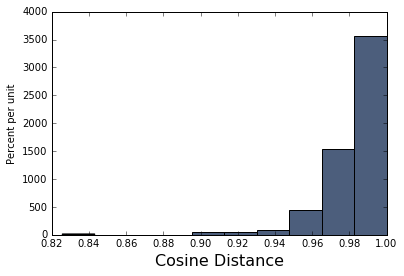

In [106]:
cosine.hist('Cosine Distance')